# Support Vector Regression (SVR)

* `Feature scaling`, and `reverse feature scaling`
* Dependend (y), feature scaling ponieważ nie są to wartości 0-1 jak w `preprocesing` file, tylko normalne wartosci pensji. `y` kilka rzedów wielkosci wieksze niż `X`
* transformacja 1D wektora na 2D wektor, bo `StandardScaler` oczekuje argumentu w takiej postaci

## Importing the libraries

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [161]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [162]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [163]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [164]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [165]:
y = y.reshape(len(y),1)

In [166]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

### Scalowanie X, y osobno poniważ inaczej dalej bedą w różnić sie o kilka rzedów wielkości, jesli do Scalowania y użyjemy średniej i std zaczerpnietych z X

In [167]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [168]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [169]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

### Model nie linowy, stosowany ebdzie `RBF`, The gaussian RBF Kernel

In [170]:
#y = y.flatten()

In [171]:
from sklearn.svm import SVR

regressor = SVR(kernel= "rbf")
regressor.fit(X, y)

c:\Users\Przemo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

### Zeskalowanie wartości 6.5 dla której chemy przewidzieć do scali takiej jak X

In [172]:
value_to_predict_scaled = sc_X.transform([[6.5]])
value_to_predict_scaled

array([[0.34815531]])

In [173]:
scaled_prediction = regressor.predict( value_to_predict_scaled )
scaled_prediction

array([-0.27861589])

### [ ] ponieważ scaled_prediction to `1D` array, transform oczekuje `2D`. Alternatywnie `.reshape(1,1)`

In [174]:
sc_y.inverse_transform( [scaled_prediction] ) #[] ponieważ scaled_prediction

array([[170370.0204065]])

In [175]:
scaled_prediction.reshape(1,1)

array([[-0.27861589]])

In [176]:
sc_y.inverse_transform( scaled_prediction.reshape(1,1) ) 

array([[170370.0204065]])

## Visualising the SVR results

In [177]:
predicted_values_scaled = regressor.predict(X)
predicted_values_scaled

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [178]:
predicted_values = sc_y.inverse_transform([predicted_values_scaled]).reshape(10,1)
predicted_values

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

In [179]:
sc_X_inverse = sc_X.inverse_transform(X)
sc_X_inverse

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

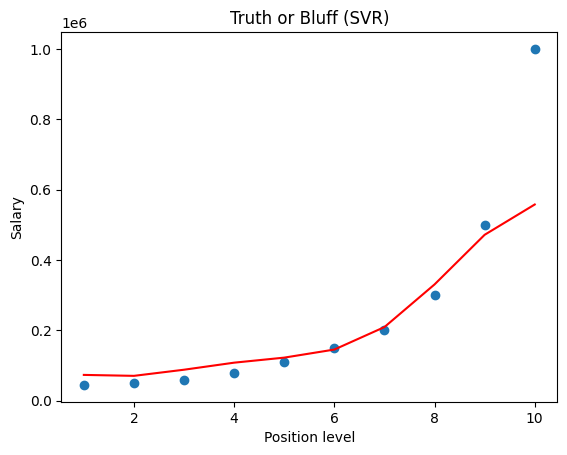

In [180]:
plt.rcdefaults()
plt.scatter(x= sc_X.inverse_transform(X), y= sc_y.inverse_transform(y))
plt.plot(sc_X_inverse, predicted_y_values, color = "Red")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [181]:
x_grid = np.linspace(start = 1, stop = 10, num = 10000)
#x_grid = np.arange(1, 10, step= 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
x_grid

array([[ 1.        ],
       [ 1.00090009],
       [ 1.00180018],
       ...,
       [ 9.99819982],
       [ 9.99909991],
       [10.        ]])

In [182]:
x_grid_scaled = sc_X.transform(x_grid)
x_grid_scaled

array([[-1.5666989 ],
       [-1.56638553],
       [-1.56607216],
       ...,
       [ 1.56607216],
       [ 1.56638553],
       [ 1.5666989 ]])

In [183]:
y_grid_scaled = regressor.predict(x_grid_scaled)
y_grid_scaled = y_grid_scaled.reshape(len(y_grid_scaled), 1)
y_grid_scaled

array([[-0.6197853 ],
       [-0.61983922],
       [-0.61989306],
       ...,
       [ 1.0853544 ],
       [ 1.08547632],
       [ 1.08559794]])

In [184]:
y_grid = sc_y.inverse_transform(y_grid_scaled)
y_grid

array([[ 73474.15615697],
       [ 73458.84117883],
       [ 73443.55060958],
       ...,
       [557752.59184063],
       [557787.21807168],
       [557821.75899897]])

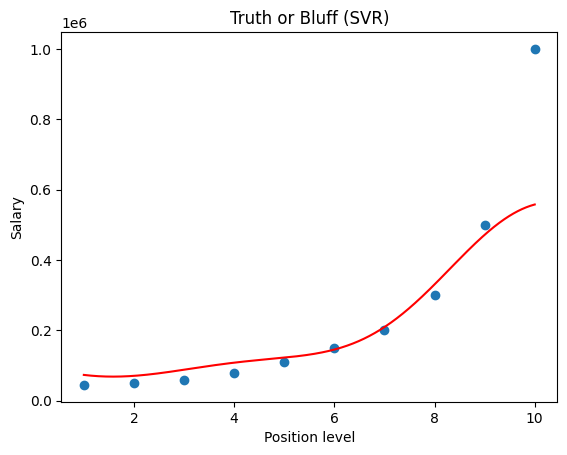

In [185]:
plt.rcdefaults()
plt.scatter(x= sc_X.inverse_transform(X), y= sc_y.inverse_transform(y))
plt.plot(x_grid, y_grid, color = "Red")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()